In [184]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import sklearn
import sklearn.metrics
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, InsetPosition,mark_inset

In [222]:
results2open = [0, 8, 2, 1, 9]
Keys = ["ProbSparse Attention w/ VAT", "Canonical Attention w/ VAT", "ProbSparse Attention w/o VAT",
       "Canonical Attention w/o VAT", "Canonical Attention w/ RQS"]
keys = ["Proposed", "Canonical Attention", "Proposed w/o VAT", "Canonical Attention w/ VAT"]
y = np.asarray(([[0, 1, 2, 3, 4]*200]) * len(results2open))
y_hat = []
logits = []

for folder in results2open:
    logits_per_fold = []
    path = str(folder)
    for i in range(10):
        logits_per_fold += [np.load(os.path.join(path, f"fold{i+1}.npy"))]
    logits_per_fold = np.concatenate(logits_per_fold)
    logits.append(logits_per_fold)
y_hat = np.argmax(logits, axis=2)

# Acc, Sen, Spe, F1

In [223]:
for i in range(len(results2open)):
    print(f"----------------------------{results2open[i]}----------------------------")
    print(sklearn.metrics.classification_report(y[i], y_hat[i], digits=5))

----------------------------0----------------------------
              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000       200
           1    1.00000   1.00000   1.00000       200
           2    1.00000   1.00000   1.00000       200
           3    1.00000   1.00000   1.00000       200
           4    1.00000   1.00000   1.00000       200

    accuracy                        1.00000      1000
   macro avg    1.00000   1.00000   1.00000      1000
weighted avg    1.00000   1.00000   1.00000      1000

----------------------------8----------------------------
              precision    recall  f1-score   support

           0    0.98985   0.97500   0.98237       200
           1    0.96020   0.96500   0.96259       200
           2    0.98995   0.98500   0.98747       200
           3    0.96552   0.98000   0.97270       200
           4    0.99500   0.99500   0.99500       200

    accuracy                        0.98000      1000
   macro avg   

In [224]:
for i in range(len(results2open)):
    print(f"---------------------------------{results2open[i]}---------------------------------")
    for label in range(5):
        idx = np.where(y[i] == label)
        y_per_label = np.zeros(1000)
        y_per_label[idx] = 1
        idx = np.where(y_hat[i] == label)
        y_hat_per_label = np.zeros(1000)
        y_hat_per_label[idx] = 1
        print(f"------------------------class {label}------------------------")
        print(sklearn.metrics.classification_report(y_per_label, y_hat_per_label, digits=8))

---------------------------------0---------------------------------
------------------------class 0------------------------
              precision    recall  f1-score   support

         0.0  1.00000000 1.00000000 1.00000000       800
         1.0  1.00000000 1.00000000 1.00000000       200

    accuracy                      1.00000000      1000
   macro avg  1.00000000 1.00000000 1.00000000      1000
weighted avg  1.00000000 1.00000000 1.00000000      1000

------------------------class 1------------------------
              precision    recall  f1-score   support

         0.0  1.00000000 1.00000000 1.00000000       800
         1.0  1.00000000 1.00000000 1.00000000       200

    accuracy                      1.00000000      1000
   macro avg  1.00000000 1.00000000 1.00000000      1000
weighted avg  1.00000000 1.00000000 1.00000000      1000

------------------------class 2------------------------
              precision    recall  f1-score   support

         0.0  1.00000000 1.00

# ROC

---------------------------------0---------------------------------
ROC AUC: 0.9999999999999999
---------------------------------8---------------------------------
ROC AUC: 0.99908175
---------------------------------2---------------------------------
ROC AUC: 0.999017375
---------------------------------1---------------------------------
ROC AUC: 0.9965765
---------------------------------9---------------------------------
ROC AUC: 0.99768525


/var/folders/y3/062pz2h97vj3b00836tpzmqc0000gn/T/ipykernel_80896/1965497340.py:3: MatplotlibDeprecationWarning: The InsetPosition class was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use Axes.inset_axes instead.
  ip = InsetPosition(ax1, [0.4,0.3,0.5,0.5])


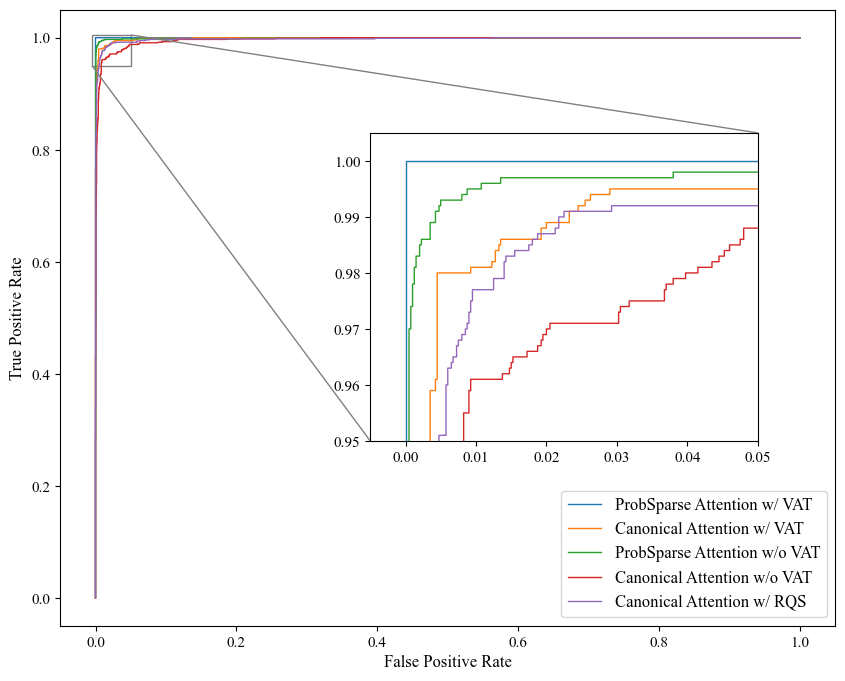

In [236]:
fig, ax1 = plt.subplots(figsize=(10, 8))
ax2 = plt.axes([0,0,1,1])
ip = InsetPosition(ax1, [0.4,0.3,0.5,0.5])
ax2.set_axes_locator(ip)
# Mark the region corresponding to the inset axes on ax1 and draw lines
# in grey linking the two axes.
mark_inset(ax1, ax2, loc1=1, loc2=3, fc="none", ec='0.5',zorder=-1)

lines = []
for i in range(len(results2open)):
    print(f"---------------------------------{results2open[i]}---------------------------------")
    probs = []
    roc_y = []
    for label in range(5):
            idx = np.where(y[i] == label)
            y_per_label = np.zeros(1000)
            y_per_label[idx] = 1
            probs.append(logits[i][:, label])
            roc_y.append(y_per_label)
    probs = np.concatenate(probs)
    roc_y = np.concatenate(roc_y)
    tpr, fpr, th = sklearn.metrics.roc_curve(roc_y, probs, drop_intermediate=False)
    ax1.plot(tpr, fpr, linewidth=1., label=Keys[i])
    ax2.plot(tpr, fpr, linewidth=1.)
    print(f"ROC AUC: {sklearn.metrics.auc(tpr, fpr)}")
ax2.set_ylim(0.950, 1.005)
ax2.set_xlim(-0.005, 0.050)
ax1.set_xlabel('False Positive Rate', fontsize=12)
ax1.set_ylabel('True Positive Rate', fontsize=12)
ax1.legend(fontsize=12)
ax1.tick_params(axis='both', which='major', labelsize=11)
ax2.tick_params(axis='both', which='major', labelsize=11)
# ax2.set_yticklabels(ax2.get_yticks())
# ax2.tick_params(axis='y', which='a', pad=0.1)
plt.show()
fig.savefig("ROC.pdf")